<a href="https://colab.research.google.com/github/nonoumasy/Deep-Learning-on-Tips-dataset/blob/master/Deep_Learning_on_Tips_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold


from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
tips_df = sns.load_dataset('tips')

#Classification


In [0]:
# classification

X = tips_df.drop(['sex'], axis=1)
y = to_categorical(pd.Categorical(tips_df.sex).codes)


In [0]:
# preprocessing for classification
col_trans = make_column_transformer((OneHotEncoder(), ['time', 'smoker', 'day']), remainder ='passthrough')
scaler = StandardScaler()

pipe = make_pipeline(col_trans, scaler)
X_scaled = pipe.fit_transform(X)

In [8]:
# deep learning classification
n_cols = X_scaled.shape[1]

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_scaled, 
          y, 
          epochs=100, 
          validation_split=0.3,
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
          batch_size=32,
          )







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 170 samples, validate on 74 samples
Epoch 1/100





170/170 [==============================] - 8s 49ms/step - loss: 0.6824 - acc: 0.5853 - val_loss: 0.6540 - val_acc: 0.6622
Epoch 2/100
170/170 [==============================] - 0s 142us/step - loss: 0.6482 - acc: 0.6500 - val_loss: 0.6150 - val_acc: 0.6689
Epoch 3/100
170/170 [==============================] - 0s 170us/step - loss: 0.6361 - acc: 0.6559 - val_loss: 0.6076 - val_acc: 0.6757
Epoch 4/100
170/170 [==============================] - 0s 151us/step - loss: 0.6299 - acc: 0.6647 - val_loss: 0.6081 - val_acc: 0.6892
Epoch 5/100
170/170 [==============================] - 0s 161us/step - loss: 0.6260 - acc: 0.6500 - val_loss: 0.6113 - val_acc: 0.6824
Epoch 6/100
170/170 [==============================] - 0s 172us/step - loss: 0.6203 - acc: 0.6500 - val_loss: 0.6180 - val_acc: 0.6892
Epoch 7/100
170/170 [==================

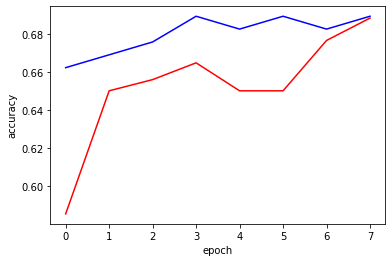

In [12]:
plt.plot(model.history.history['acc'], 'r')
plt.plot(model.history.history['val_acc'], 'b')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 16,452
Trainable params: 16,452
Non-trainable params: 0
_________________________________________________________________


In [0]:
# deep learning classification with RandomSearchCV
def create_model(activation='relu', learning_rate=0.01):
  n_cols = X_scaled.shape[1]
  opt = Adam(lr=learning_rate)

  model = Sequential()
  model.add(Dense(50, activation=activation, input_shape=(n_cols,)))
  model.add(Dense(50, activation=activation, input_shape=(n_cols,)))
  model.add(Dense(50, activation=activation, input_shape=(n_cols,)))
  model.add(Dense(2, activation='sigmoid'))
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

  model.fit(X_scaled, 
          y, 
          #epochs=epochs, 
          validation_split=0.3,
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
          #batch_size=batch_size,
          )
  return model

Kmodel = KerasClassifier(build_fn=create_model)

# Define the parameters to try out
params = {'activation':['relu', 'tanh'], 'batch_size':[32, 128, 256], 
          'epochs':[50, 100, 200], 'learning_rate':[0.1, 0.01, 0.001]}

random_search = RandomizedSearchCV(Kmodel, param_distributions=params, cv=KFold(3))
random_search.fit(X_scaled, y)

In [9]:
random_search.best_params_

{'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'learning_rate': 0.1}

# Regression

In [0]:
# regression

X = tips_df.drop(['tip'], axis=1)
y = tips_df['tip']
y = y.values.reshape(-1,1)

In [0]:
# deep learning regression 

n_cols = X_scaled.shape[1]

model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(n_cols,)))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_scaled, y, validation_split=0.3, epochs=5)

In [0]:
# preprocessing for regression
col_trans = make_column_transformer((OneHotEncoder(), ['sex', 'smoker', 'day', 'time']), remainder ='passthrough')
scaler = StandardScaler()

pipe = make_pipeline(col_trans, scaler)
X_scaled = pipe.fit_transform(X)

In [14]:
# Using LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y)

lin_reg = LogisticRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

accuracy_score(y_test, y_pred)

ValueError: ignored